In [1]:
import matplotlib.pyplot as plt
import numpy as np

Common constants

In [2]:
t_start = 0
t_end = 200
h = 0.1

Stationary case constants

In [3]:
a1 = 0.1
b1 = 0.02
c1 = 0.1
e1 = 0.01
R01 = c1 / e1
P01 = a1 / b1

Non-stationary case constants (small deviation from stationary case)

In [4]:
a2 = 0.1
b2 = 0.02
c2 = 0.1
e2 = 0.01
R02 = R01 + 5
P02 = P01 + 2

Non-stationary case constants (large deviation from stationary case)

In [5]:
a3 = 0.1
b3 = 0.02
c3 = 0.1
e3 = 0.01
R03 = R01 + 20
P03 = P01 - 5

In [6]:
def predator_prey_system(t, y, a, b, c, e) -> np.ndarray:
    """
    Function representing the predator-prey system of differential equations.
    y[0] - R (prey), y[1] - P (predator).
    :param t_p: time
    :param y_p: array of R and P
    :param a_p: arbitrary parameter
    :param b_p: arbitrary parameter
    :param c_p: arbitrary parameter
    :param e_p: arbitrary parameter
    :return: array of dR/dt and dP/dt
    """
    dR_dt = a * y[0] - b * y[0] * y[1]
    dP_dt = -c * y[1] + e * y[0] * y[1]
    
    return np.array([dR_dt, dP_dt])

In [7]:
def runge_kutta_step(func, t_c, y_c, *params):
    """
    One step of the Runge-Kutta method.
    :param func: 
    :param t_c: time
    :param y_c: array of R and P values
    :param params: arbitrary parameters
    :return: array of R and P values after one step
    """
    k1 = h * func(t_c, y_c, *params)
    k2 = h * func(t_c + 0.5 * h, y_c + 0.5 * k1, *params)
    k3 = h * func(t_c + 0.5 * h, y_c + 0.5 * k2, *params)
    k4 = h * func(t_c + h, y_c + k3, *params)

    return y_c + (k1 + 2 * k2 + 2 * k3 + k4) / 6

In [11]:
def solve_system(a, b, c, e, R0, P0) -> (np.ndarray, np.ndarray):
    """
    Solves the predator-prey system of differential equations using the Runge-Kutta method.
    :param a: arbitrary parameter
    :param b: arbitrary parameter
    :param c: arbitrary parameter
    :param e: arbitrary parameter
    :param R0: initial prey population
    :param P0: initial predator population
    :return: array of time values, array of R and P values
    """
    num_steps = int((t_end - t_start) / h) + 1
    t_values = np.linspace(t_start, t_end, num_steps)
    y_values = np.zeros((num_steps, 2))
    y_values[0] = np.array([R0, P0])

    for i in range(1, num_steps):
        y_values[i] = runge_kutta_step(predator_prey_system, t_values[i - 1], y_values[i - 1], a, b, c, e)

    return t_values, y_values

In [12]:
t_values1, y_values1 = solve_system(a1, b1, c1, e1, R01, P01)
t_values2, y_values2 = solve_system(a2, b2, c2, e2, R02, P02)
t_values3, y_values3 = solve_system(a3, b3, c3, e3, R03, P03)

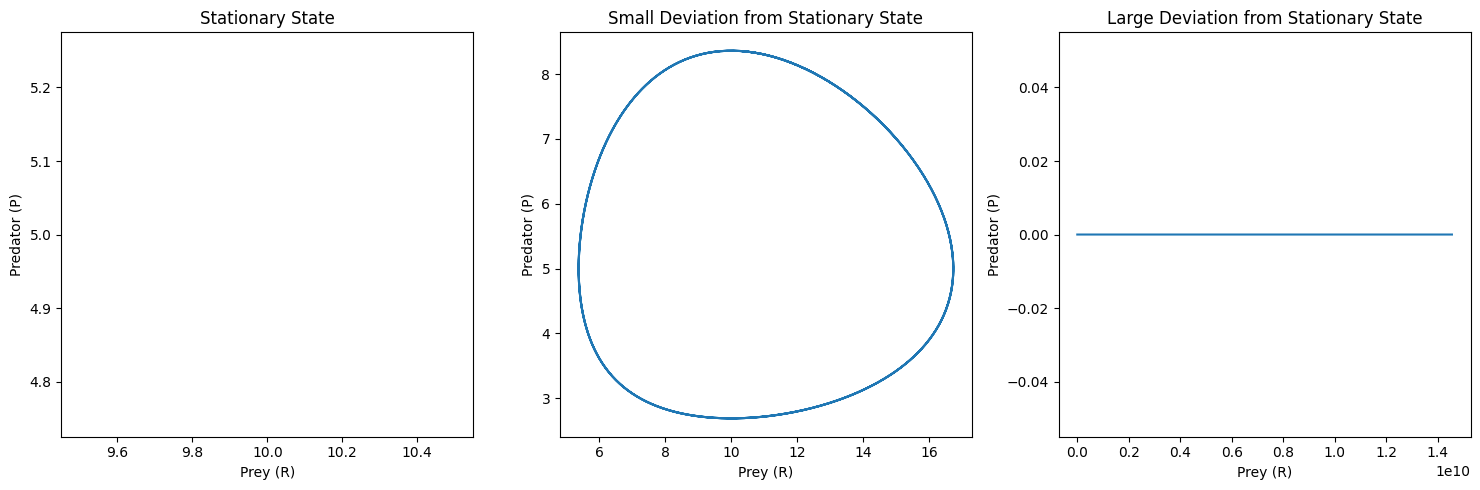

In [13]:
# Plot Case 1
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(y_values1[:, 0], y_values1[:, 1])
plt.title('Stationary State')
plt.xlabel('Prey (R)')
plt.ylabel('Predator (P)')

# Plot Case 2
plt.subplot(1, 3, 2)
plt.plot(y_values2[:, 0], y_values2[:, 1])
plt.title('Small Deviation from Stationary State')
plt.xlabel('Prey (R)')
plt.ylabel('Predator (P)')

# Plot Case 3
plt.subplot(1, 3, 3)
plt.plot(y_values3[:, 0], y_values3[:, 1])
plt.title('Large Deviation from Stationary State')
plt.xlabel('Prey (R)')
plt.ylabel('Predator (P)')

plt.tight_layout()
plt.show()

In [ ]:
plt.plot(t, y[:, 0], label='Prey (R)')
plt.plot(t, y[:, 1], label='Predator (P)')
plt.title('Population Dynamics over Time')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()